In [1]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.sparse.linalg import svds
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import inv
from scipy.spatial import cKDTree

from numpy.core.umath_tests import inner1d
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from mudata import MuData
import os.path as path
import seaborn as sns
import numexpr as ne
import pandas as pd
import scanpy as sc
import numpy as np
import muon as mu
import anndata
import h5py
import time
import umap
import gc

/tmp/4634270.1.parallel.q/ipykernel_4248/2680485318.py:15: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/mnt/iusers01/fatpou01/bmh01/t48955xm/.conda/envs/maxxxxxxxin/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# PREPROCESSING (Customized)

In [2]:
data = sc.read_h5ad("./cite-seq/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad")

/mnt/iusers01/fatpou01/bmh01/t48955xm/.conda/envs/maxxxxxxxin/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
data

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [4]:
X = data.X
X_gene = X[:,data.var['feature_types']=='GEX']
X_adt = X[:,data.var['feature_types']=='ADT']

In [11]:
X_gene.shape, X_adt.shape

((90261, 13953), (90261, 134))

In [12]:
Agene = sc.AnnData(X_gene)

In [13]:
sc.pp.filter_genes(Agene, min_cells=100)

In [14]:
sc.pp.normalize_total(Agene, target_sum=1e4)
sc.pp.log1p(Agene)

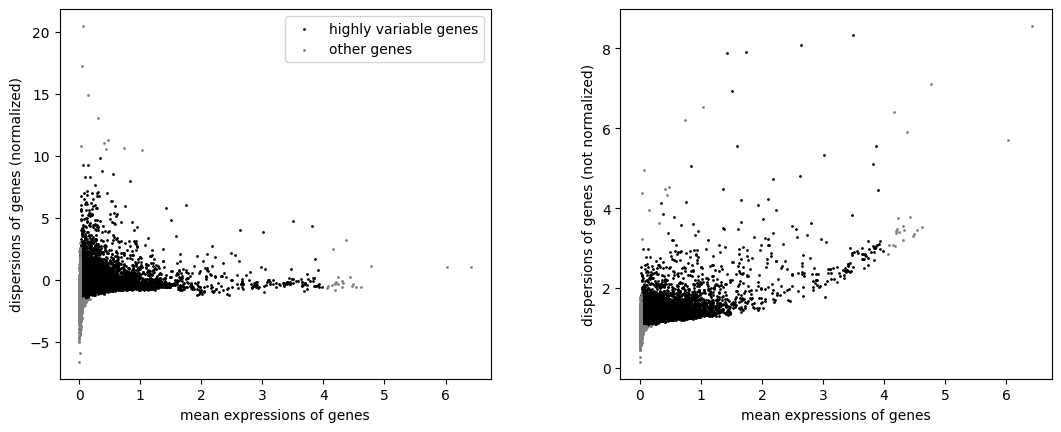

In [16]:
sc.pp.highly_variable_genes(Agene, min_mean=0.02, max_mean=4, min_disp= -1.5, max_disp = 10)
sc.pl.highly_variable_genes(Agene)

In [17]:
HVG = Agene[:, Agene.var['highly_variable'] == True]